In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
#Lectura
data = pd.read_csv("customer_shopping_data.csv")

In [4]:
print(data.shape)
data.head()

(99457, 10)


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
#Seleccionamos las columnas que nos interesan
columnas_interes= ['gender', 'age', 'category', 'quantity', 'price','payment_method','invoice_date']
datanew = data[columnas_interes]
print(datanew.shape)
datanew.head(20)

(99457, 7)


,gender,age,category,quantity,price,payment_method,invoice_date
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021
2,Male,20,Clothing,1,300.08,Cash,9/11/2021
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021
4,Female,53,Books,4,60.60,Cash,24/10/2021
5,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022
6,Female,49,Cosmetics,1,40.66,Cash,13/03/2022
7,Female,32,Clothing,2,600.16,Credit Card,13/01/2021
8,Male,69,Clothing,3,900.24,Credit Card,4/11/2021
9,Female,60,Clothing,2,600.16,Credit Card,22/08/2021


In [6]:
#Observamos los rangos de valores de cada variable
datanew.describe().loc[['min','max']]

,age,quantity,price
min,18.0,1.0,5.23
max,69.0,5.0,5250.00


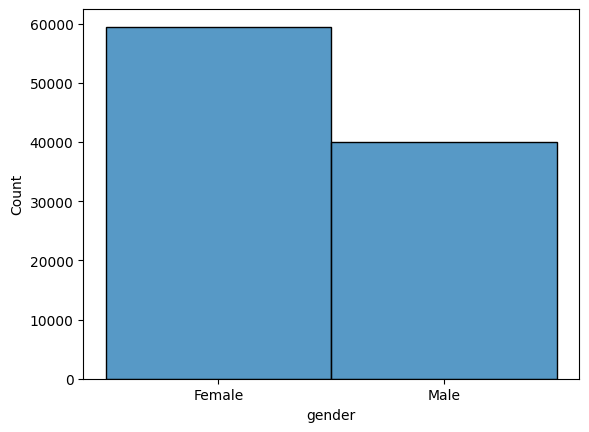

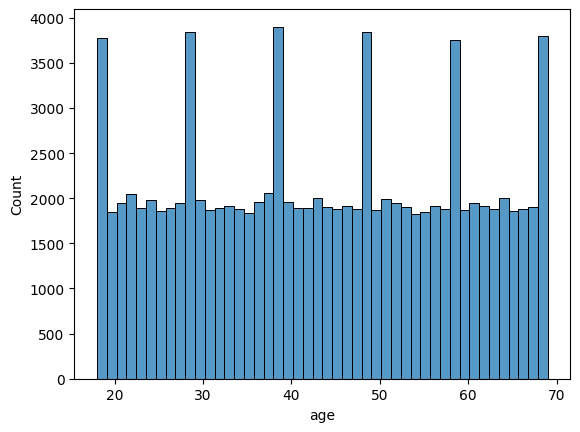

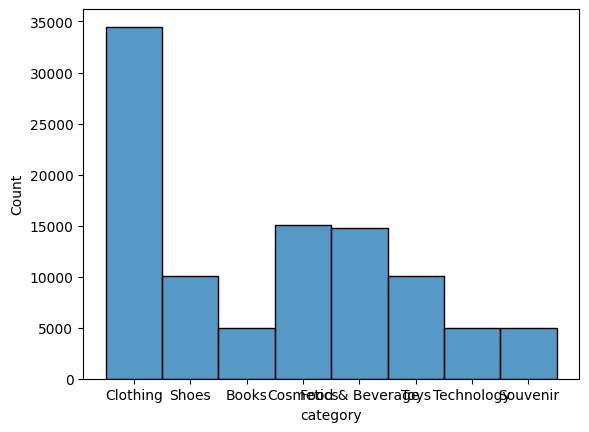

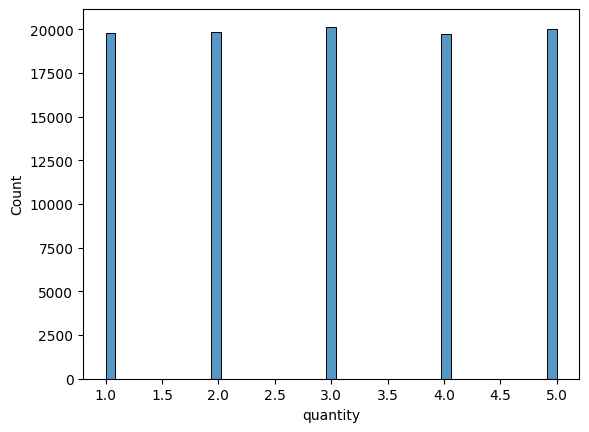

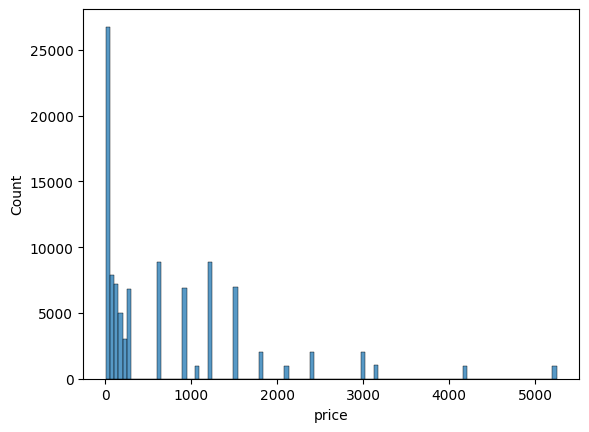

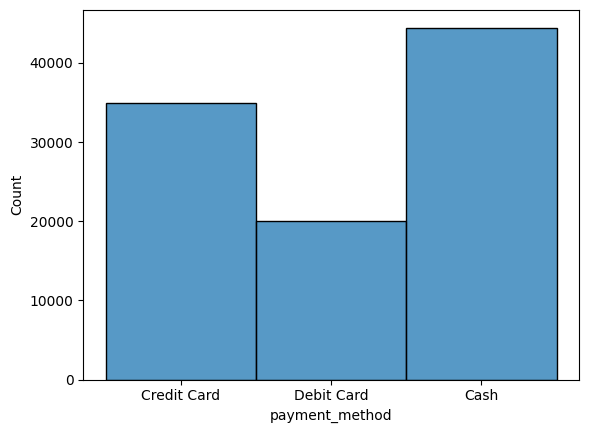

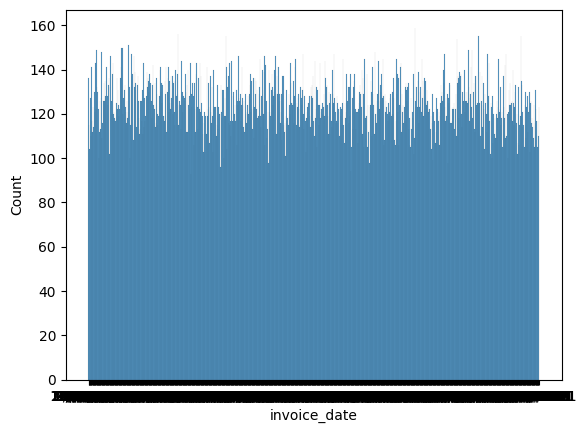

In [7]:
#Dibujar el histograma de cada columna
for col in datanew.columns:
    plt.figure()
    sns.histplot(datanew[col])

In [8]:
#Veamos las variables categóricas y las variables numéricas
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99457 non-null  object 
 1   age             99457 non-null  int64  
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   payment_method  99457 non-null  object 
 6   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB


In [9]:
#Eliminar los datos faltantes, porque tenemos una cantidad de dato sufientes, si no tambien podriamos usar modelos de ML para crear los datos
datanew.dropna(inplace = True)
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99457 non-null  object 
 1   age             99457 non-null  int64  
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   payment_method  99457 non-null  object 
 6   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB


C:\Users\carli\AppData\Local\Temp\ipykernel_952\3530920902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew.dropna(inplace = True)


In [10]:
#Eliminamos las columnas duplicadas, con toda la data no aparece ninguno igual porque invoice number y customerid son diferentes,
#pero de las columnas que queremos trabajar si hay casos que se repiten y los vamos a eliminar para evitar sesgos con registros idénticos
data.drop_duplicates(inplace=True)
data.info()
datanew.drop_duplicates(inplace=True)
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 98553 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          98553 non-null  object 
 1   age             98553 non-null  int64  
 2   c

C:\Users\carli\AppData\Local\Temp\ipykernel_952\1899099027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew.drop_duplicates(inplace=True)


In [11]:
#Ahora vamos a ver si hay alguna columna irrelevante que ya puede ser porque para el problema que tenemos no aporte nada, porque todos los datos son iguales
#o tambien si contienen información redundante por ejemplo una columna para month otra para day y otra para month-day
#En este caso parece que todas las columnas son importantes pero vamos a comprobar que no todas tienen el mismo valor en las columndas categoricas
cols_cat= ['gender','category','payment_method']

for col in cols_cat:
    print(f"Columna: {col}, Subniveles: {datanew[col].nunique()}")

Columna: gender, Subniveles: 2
Columna: category, Subniveles: 8
Columna: payment_method, Subniveles: 3


In [12]:
#Verifiquemos que ocurre con las columnas numericas
datanew.describe()

,age,quantity,price
count,98553.000000,98553.000000,98553.000000
mean,43.423914,3.003318,688.860503
std,14.988818,1.413043,943.136085
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [13]:
datanew['invoice_date'] = pd.to_datetime(datanew['invoice_date'], format='%d/%m/%Y', dayfirst=True)
datanew['month'] = datanew['invoice_date'].dt.month

C:\Users\carli\AppData\Local\Temp\ipykernel_952\2108772853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['invoice_date'] = pd.to_datetime(datanew['invoice_date'], format='%d/%m/%Y', dayfirst=True)
C:\Users\carli\AppData\Local\Temp\ipykernel_952\2108772853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['month'] = datanew['invoice_date'].dt.month


In [14]:
print(datanew.shape)
datanew.head(20)

(98553, 8)


,gender,age,category,quantity,price,payment_method,invoice_date,month
0,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,8
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,12
2,Male,20,Clothing,1,300.08,Cash,2021-11-09,11
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,5
4,Female,53,Books,4,60.60,Cash,2021-10-24,10
5,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,5
6,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,3
7,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,1
8,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,11
9,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,8


In [15]:
tipo_de_cambio = 0.026  # Ejemplo: multiplicar por 1.1 para convertir a otra moneda
datanew['price'] = datanew['price'] * tipo_de_cambio

C:\Users\carli\AppData\Local\Temp\ipykernel_952\2660987731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['price'] = datanew['price'] * tipo_de_cambio


In [16]:
datanew.drop(columns=['invoice_date'], inplace=True)
datanew.head(20)


C:\Users\carli\AppData\Local\Temp\ipykernel_952\3771887933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew.drop(columns=['invoice_date'], inplace=True)


,gender,age,category,quantity,price,payment_method,month
0,Female,28,Clothing,5,39.01040,Credit Card,8
1,Male,21,Shoes,3,46.81326,Debit Card,12
2,Male,20,Clothing,1,7.80208,Cash,11
3,Female,66,Shoes,5,78.02210,Credit Card,5
4,Female,53,Books,4,1.57560,Cash,10
5,Female,28,Clothing,5,39.01040,Credit Card,5
6,Female,49,Cosmetics,1,1.05716,Cash,3
7,Female,32,Clothing,2,15.60416,Credit Card,1
8,Male,69,Clothing,3,23.40624,Credit Card,11
9,Female,60,Clothing,2,15.60416,Credit Card,8


In [17]:
datanew['gasto_total'] = datanew['quantity']*datanew['price']
datanew.head(20)

C:\Users\carli\AppData\Local\Temp\ipykernel_952\4190935293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['gasto_total'] = datanew['quantity']*datanew['price']


,gender,age,category,quantity,price,payment_method,month,gasto_total
0,Female,28,Clothing,5,39.01040,Credit Card,8,195.05200
1,Male,21,Shoes,3,46.81326,Debit Card,12,140.43978
2,Male,20,Clothing,1,7.80208,Cash,11,7.80208
3,Female,66,Shoes,5,78.02210,Credit Card,5,390.11050
4,Female,53,Books,4,1.57560,Cash,10,6.30240
5,Female,28,Clothing,5,39.01040,Credit Card,5,195.05200
6,Female,49,Cosmetics,1,1.05716,Cash,3,1.05716
7,Female,32,Clothing,2,15.60416,Credit Card,1,31.20832
8,Male,69,Clothing,3,23.40624,Credit Card,11,70.21872
9,Female,60,Clothing,2,15.60416,Credit Card,8,31.20832


C:\Users\carli\AppData\Local\Temp\ipykernel_952\73362043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\carli\AppData\Local\Temp\ipykernel_952\73362043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\carli\AppData\Local\Temp\ipykernel_952\73362043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\carli\AppData\Local\Temp\ipykernel_952\73362043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),r

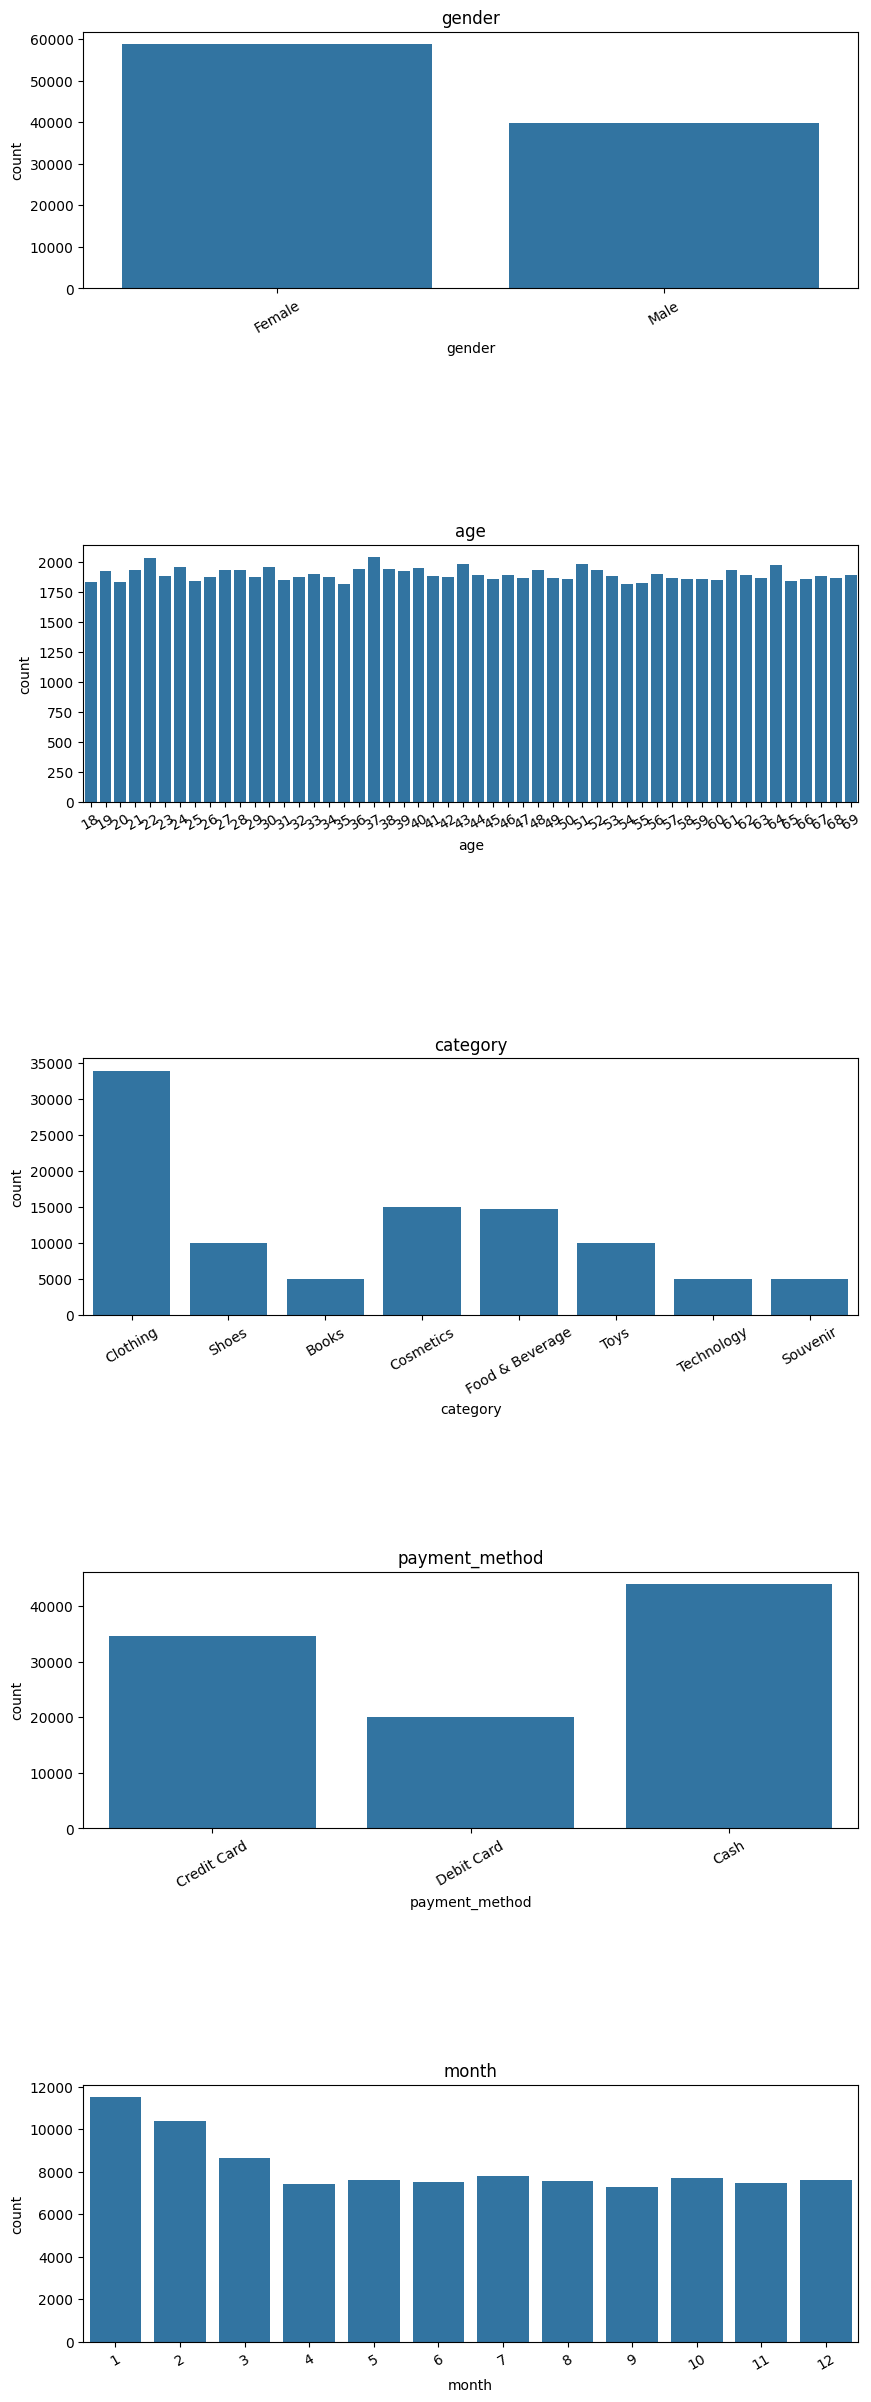

In [18]:
#Graficar los subniveles de cada variable categórica
cols_cat= ['gender', 'age', 'category', 'payment_method', 'month']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=datanew, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

,age,quantity,price,month,gasto_total
count,98553.000000,98553.000000,98553.000000,98553.000000,98553.000000
mean,43.423914,3.003318,17.910373,6.113929,65.706559
std,14.988818,1.413043,24.521538,3.569951,109.979847
min,18.000000,1.000000,0.135980,1.000000,0.135980
25%,30.000000,2.000000,1.057160,3.000000,3.399500
50%,43.000000,3.000000,5.285800,6.000000,15.604420
75%,56.000000,4.000000,31.208320,9.000000,70.218720
max,69.000000,5.000000,136.500000,12.000000,682.500000


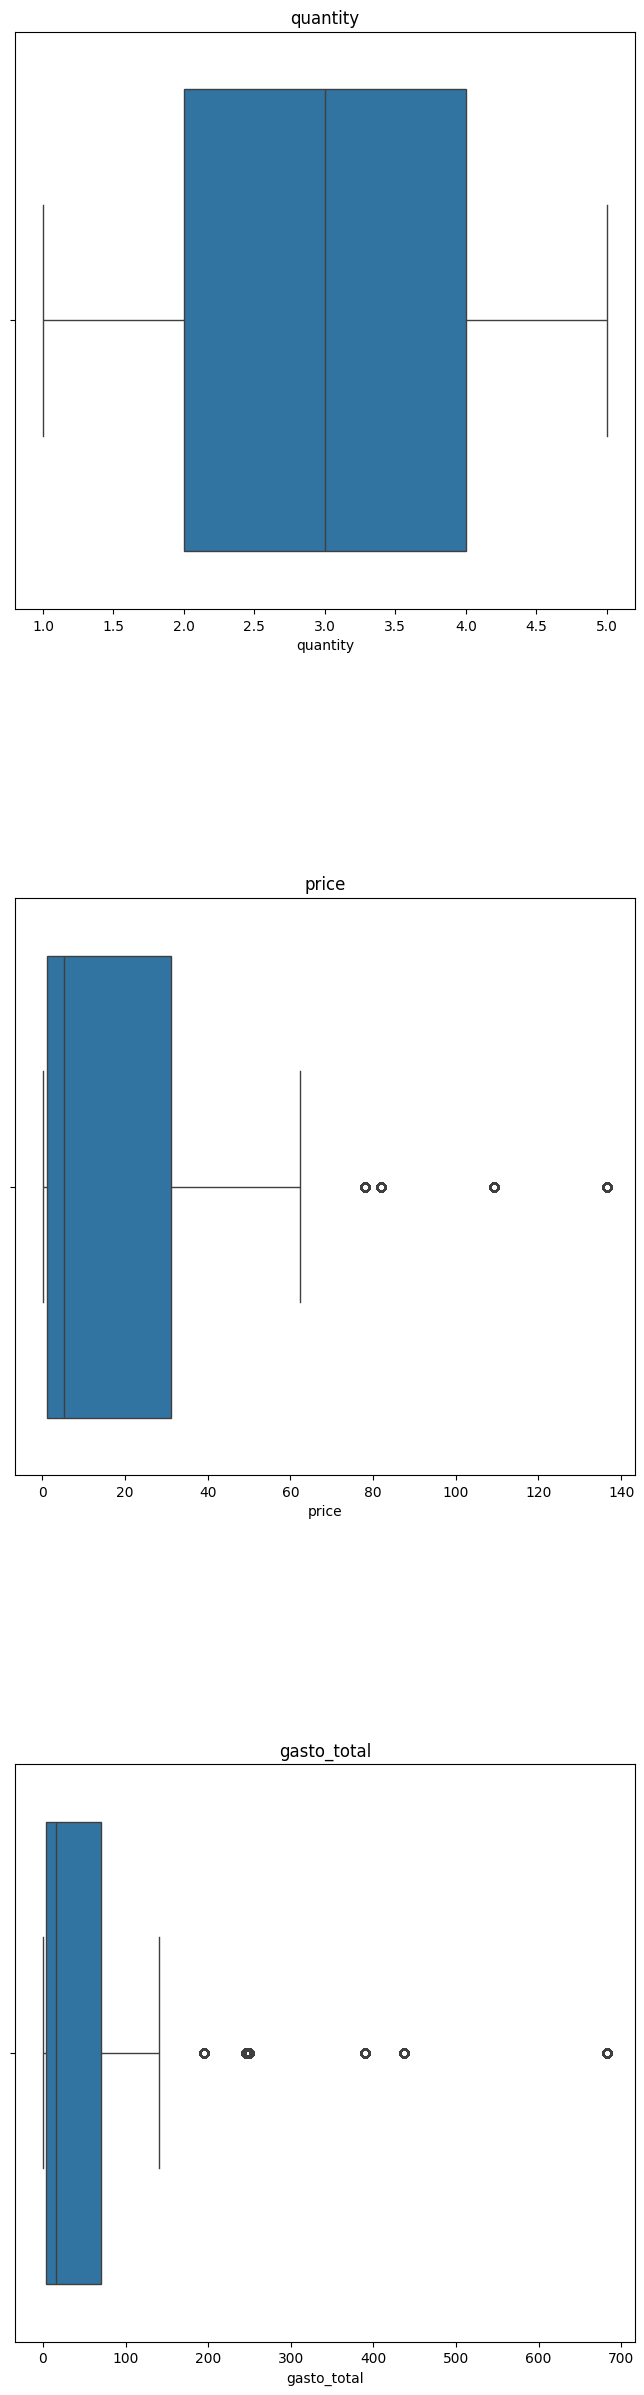

In [19]:
#Vamos a comprobar los valores extremos, dependiendo del dato porque por ejemplo una edad de 200 años si esta mal pero un balance si puede ser 1000000 o 1
#Generar gráficas individuales pues las variables numéricas están en rangos diferentes
cols_num = ['quantity','price','gasto_total']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=datanew, ax=ax[i])
    ax[i].set_title(col)

datanew.describe()    

En las gráficas anteriores hay algunos outliers porque hay productos mas caros y gente que realiza un mayor gasto pero no es muy desproporcionado
y son gastos que pueden darse asi que los dejaremos en el database

In [21]:
datanew.to_csv("customer_shopping_limpio", index=False)